In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from keras.callbacks import ModelCheckpoint
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Input, MultiHeadAttention, LayerNormalization, GlobalAveragePooling1D


In [201]:
champs_elysees=pd.read_csv('./datasets/Av_Champs_Elysees.csv',sep=';')
convention=pd.read_csv('./datasets/Convention.csv',sep=';')
sts=pd.read_csv('./datasets/Sts_Peres.csv',sep=';')

In [202]:
champs_elysees['Date et heure de comptage'] = pd.to_datetime(champs_elysees['Date et heure de comptage'],utc=True)
convention['Date et heure de comptage'] = pd.to_datetime(convention['Date et heure de comptage'],utc=True)
sts['Date et heure de comptage'] = pd.to_datetime(sts['Date et heure de comptage'],utc=True)


In [203]:
champs_elysees=champs_elysees.sort_values(by='Date et heure de comptage')
convention=convention.sort_values(by='Date et heure de comptage')
sts=sts.sort_values(by='Date et heure de comptage')

In [204]:
convention=convention[(convention['Libelle noeud amont']=='Convention-Blomet')&(convention['Libelle noeud aval']=='Lecourbe-Convention')]
sts=sts[(sts['Libelle noeud amont']=='Sts_Peres-Voltaire')&(sts['Libelle noeud aval']=='Sts_Peres-Universite')]

In [205]:
convention["Taux d'occupation"].mean()

3.207865349088165

### Focus on Champs Elysées data

In [258]:
df=champs_elysees[["Date et heure de comptage","Taux d'occupation","Débit horaire"]]

In [223]:
df

,Date et heure de comptage,Taux d'occupation,Débit horaire
2399,2022-11-01 03:00:00+00:00,8.89223,672.0
2398,2022-11-01 04:00:00+00:00,7.12889,513.0
2397,2022-11-01 05:00:00+00:00,6.22500,494.0
2866,2022-11-01 06:00:00+00:00,5.80723,513.0
2396,2022-11-01 07:00:00+00:00,5.57111,484.0
...,...,...,...
8927,2023-11-30 19:00:00+00:00,30.87000,1433.0
7484,2023-11-30 20:00:00+00:00,24.38111,1253.0
7483,2023-11-30 21:00:00+00:00,20.40723,1069.0
8926,2023-11-30 22:00:00+00:00,16.66334,950.0


In [259]:
df['Date et heure de comptage']=pd.to_datetime(df['Date et heure de comptage'])
#df.set_index('Date et heure de comptage',inplace=True)
df.dropna(inplace=True)


C:\Users\bacca\AppData\Local\Temp\ipykernel_35240\3876557901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date et heure de comptage']=pd.to_datetime(df['Date et heure de comptage'])
C:\Users\bacca\AppData\Local\Temp\ipykernel_35240\3876557901.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


C:\Users\bacca\AppData\Local\Temp\ipykernel_35240\1445141977.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date et heure de comptage"] = pd.to_datetime(df["Date et heure de comptage"])
C:\Users\bacca\AppData\Local\Temp\ipykernel_35240\1445141977.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = df['Date et heure de comptage'].dt.day_name()
C:\Users\bacca\AppData\Local\Temp\ipykernel_35240\1445141977.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

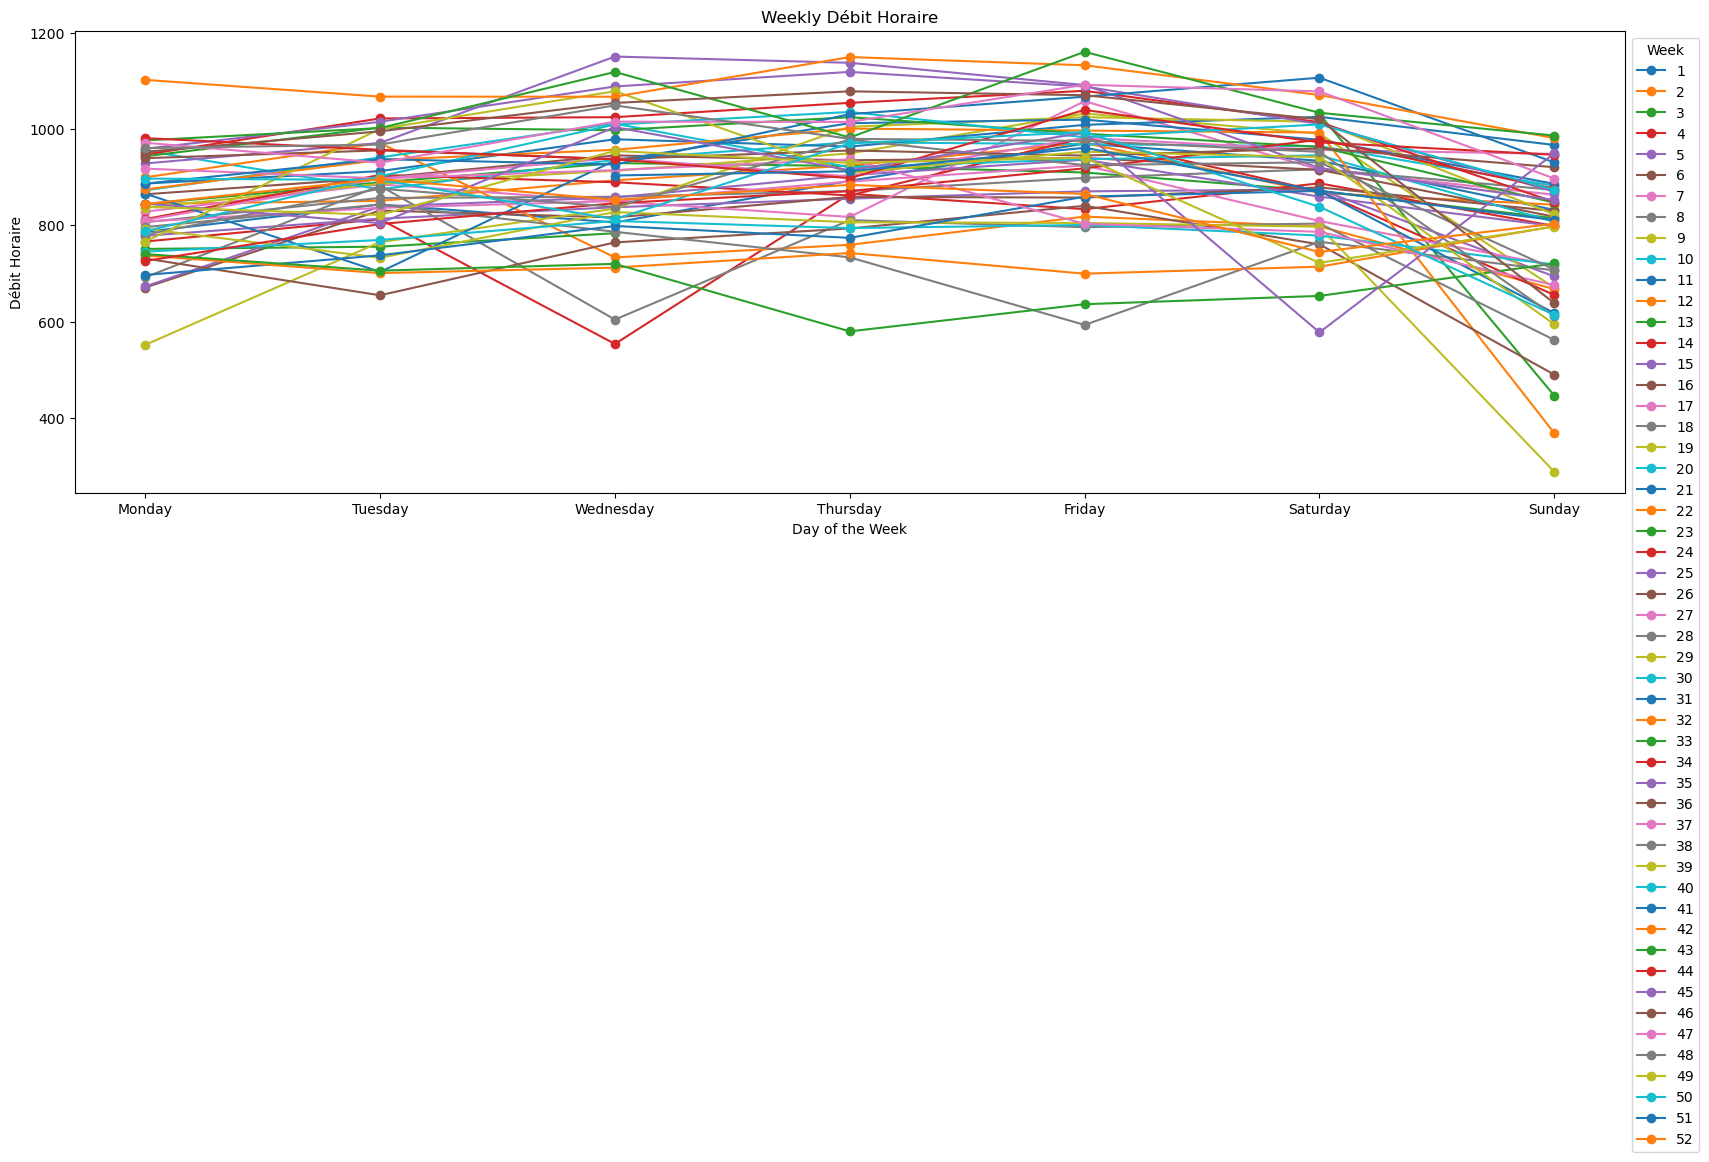

In [260]:


# Assuming 'Date et heure de comptage' is your datetime index
df["Date et heure de comptage"] = pd.to_datetime(df["Date et heure de comptage"])
df['day_of_week'] = df['Date et heure de comptage'].dt.day_name()
df['week'] = df['Date et heure de comptage'].dt.isocalendar().week

pivot = pd.pivot_table(df, values='Débit horaire', index='day_of_week', columns='week', aggfunc='mean')

# Reorder days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot = pivot.reindex(days_order)

# Plot the pivot table
pivot.plot(figsize=(20, 6), marker='o')
plt.title('Weekly Débit Horaire')
plt.xlabel('Day of the Week')
plt.ylabel('Débit Horaire')
plt.legend(title='Week', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


C:\Users\bacca\AppData\Local\Temp\ipykernel_35240\1262456588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date et heure de comptage"] = pd.to_datetime(df["Date et heure de comptage"])
C:\Users\bacca\AppData\Local\Temp\ipykernel_35240\1262456588.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['Date et heure de comptage'].dt.month
C:\Users\bacca\AppData\Local\Temp\ipykernel_35240\1262456588.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

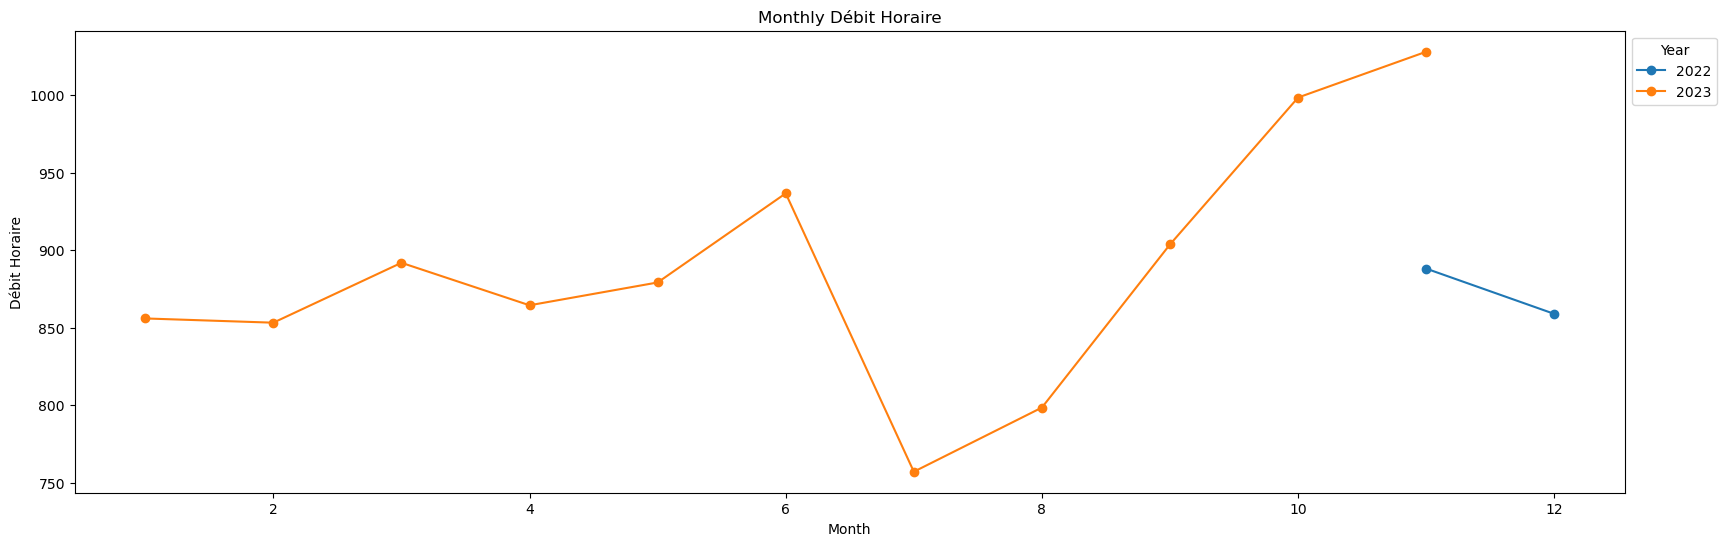

In [261]:


# Assuming 'Date et heure de comptage' is your datetime index
df["Date et heure de comptage"] = pd.to_datetime(df["Date et heure de comptage"])
df['month'] = df['Date et heure de comptage'].dt.month
df['year'] = df['Date et heure de comptage'].dt.year

pivot = pd.pivot_table(df, values='Débit horaire', index='month', columns='year', aggfunc='mean')

# Reorder months
months_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
pivot = pivot.reindex(months_order)

# Plot the pivot table
pivot.plot(figsize=(20, 6), marker='o')
plt.title('Monthly Débit Horaire')
plt.xlabel('Month')
plt.ylabel('Débit Horaire')
plt.legend(title='Year', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


<Figure size 1600x3000 with 0 Axes>

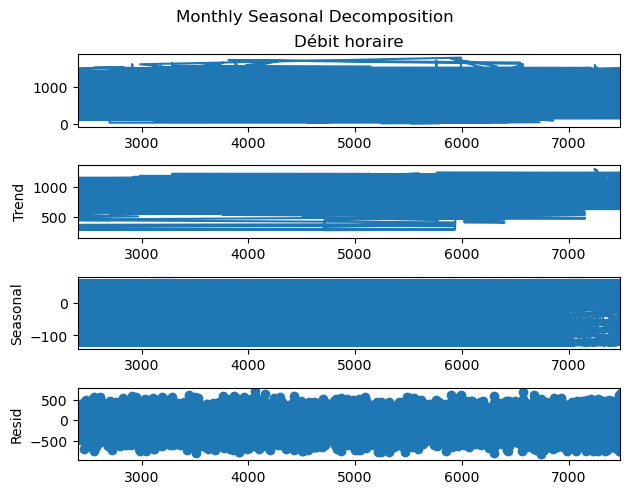

In [262]:

result = seasonal_decompose(df["Débit horaire"], model='additive', period=24)  # Assuming daily seasonality

# Increase figsize
plt.figure(figsize=(16, 30))  # Adjust the width and height as needed
result.plot()
plt.suptitle('Monthly Seasonal Decomposition', y=1.02)  # Adjust the vertical position of the title
plt.show()


C:\Users\bacca\AppData\Local\Temp\ipykernel_35240\2831133643.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date et heure de comptage'] = pd.to_datetime(df['Date et heure de comptage'])


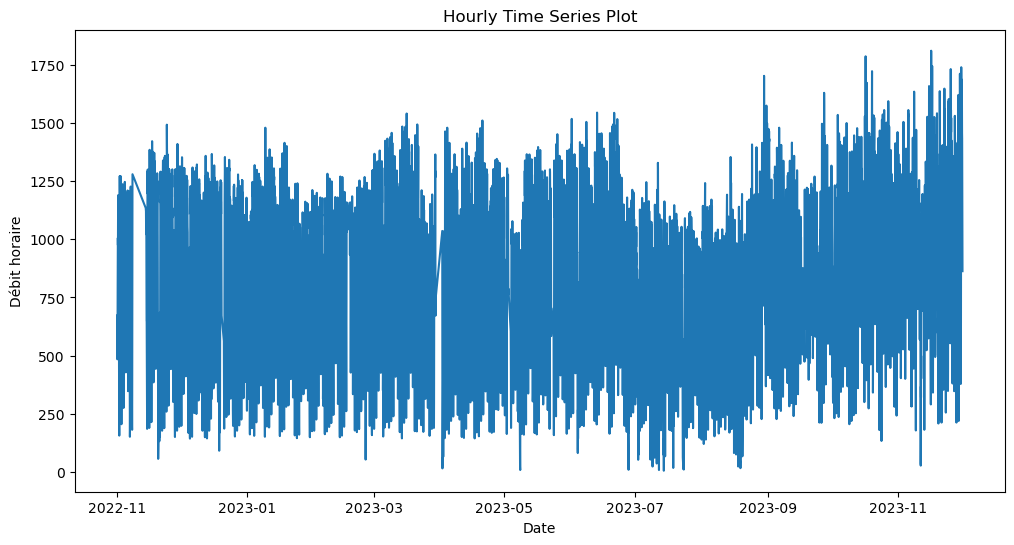

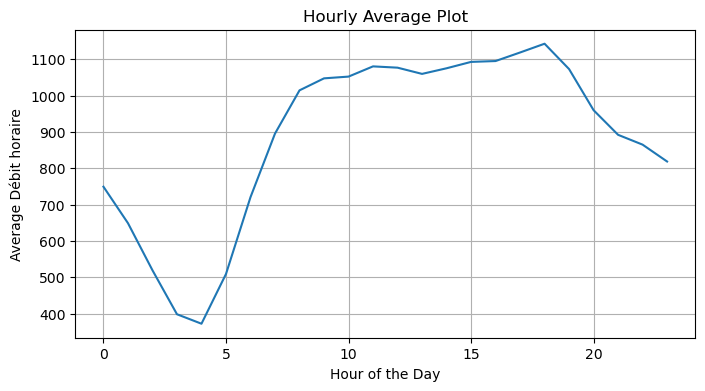

In [263]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Date' is your datetime index
df['Date et heure de comptage'] = pd.to_datetime(df['Date et heure de comptage'])
df.set_index('Date et heure de comptage', inplace=True)

# Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Débit horaire'])
plt.title('Hourly Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Débit horaire')
plt.show()

# Hourly Average Plot
hourly_avg = df.groupby(df.index.hour)['Débit horaire'].mean()
plt.figure(figsize=(8, 4))
plt.plot(hourly_avg)
plt.title('Hourly Average Plot')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Débit horaire')
plt.grid(True)

plt.show()


In [264]:
def make_time_series_plot(data,var):
    f, ax = plt.subplots(figsize=(17, 5))
    ax = sns.lineplot(data=data, y=var, x='Date et heure de comptage', ax=ax)
    start = data.head(1)['Date et heure de comptage']
    end = data.tail(1)['Date et heure de comptage']
    ax.set_title(f'{var}  from {start.dt.day.iloc[0]}-{start.dt.month.iloc[0]}-{start.dt.year.iloc[0]}- 03:00 to {end.dt.day.iloc[0]}-{end.dt.month.iloc[0]}-{end.dt.year.iloc[0]}- 23:00', fontsize=15)
    ax.grid(True, ls='-.', alpha=0.75)
    plt.show()

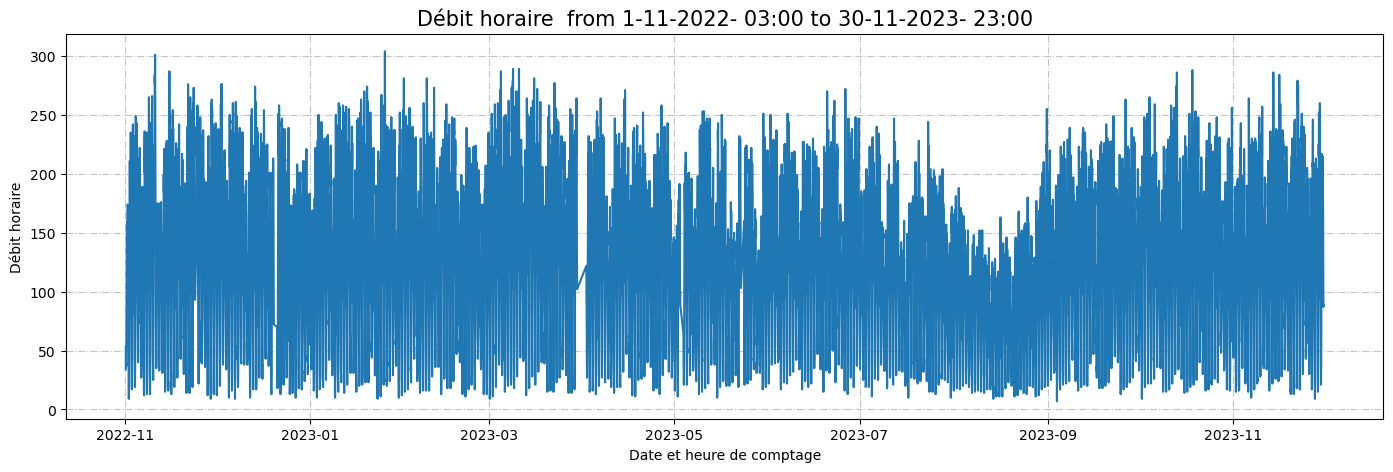

In [265]:
make_time_series_plot(convention,'Débit horaire')

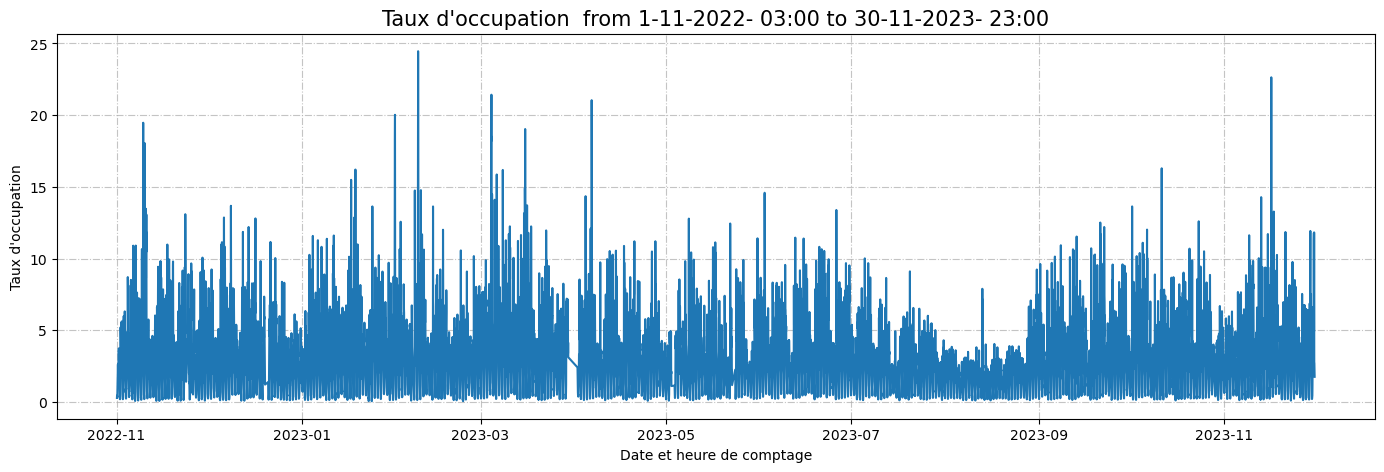

In [231]:
make_time_series_plot(convention,"Taux d'occupation")

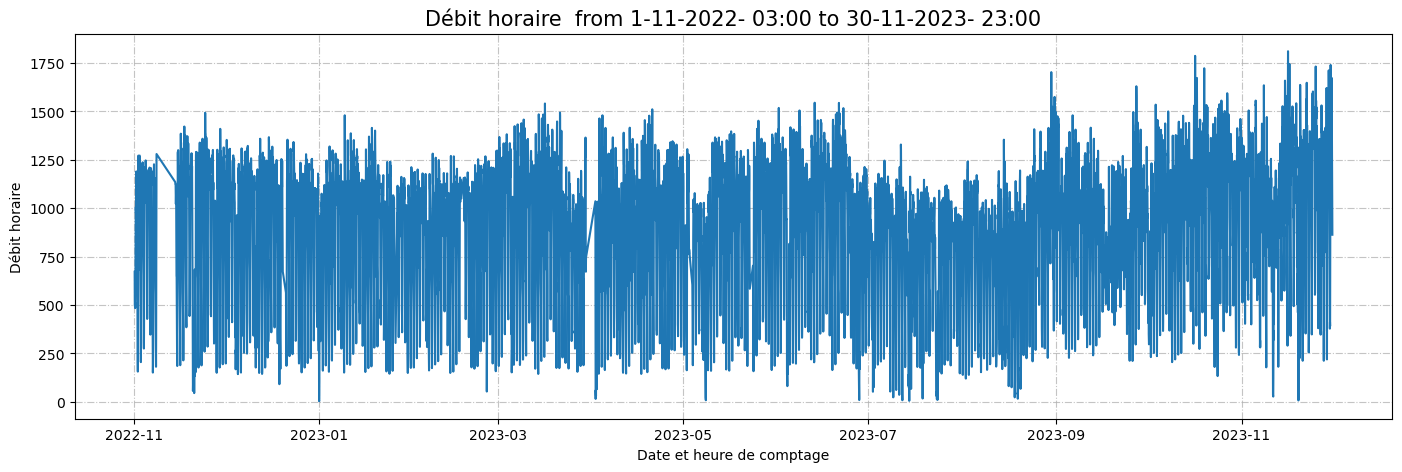

In [232]:
make_time_series_plot(champs_elysees,'Débit horaire')

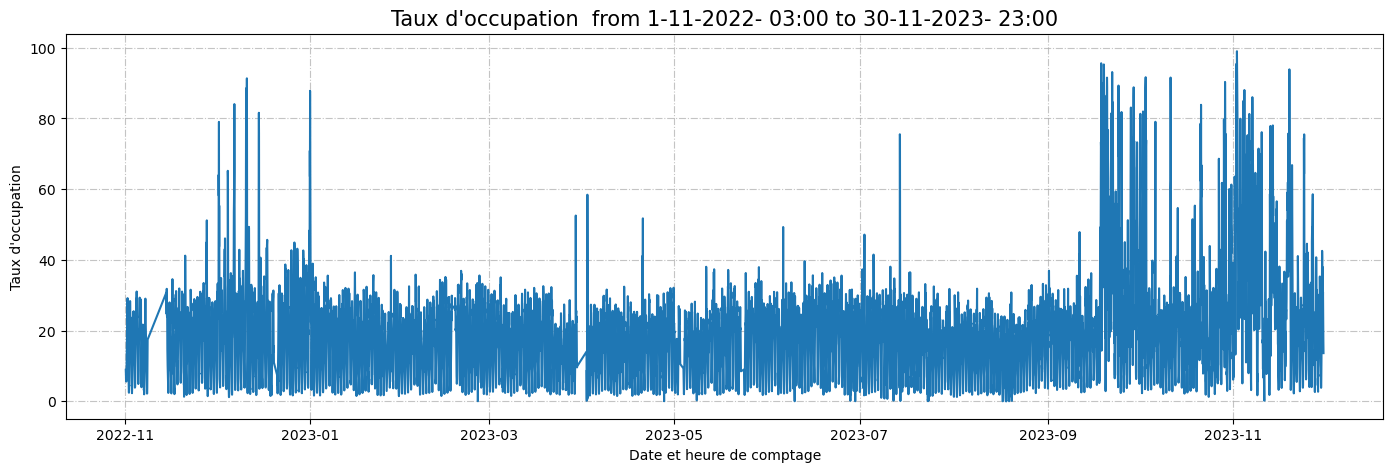

In [233]:
make_time_series_plot(champs_elysees,"Taux d'occupation")

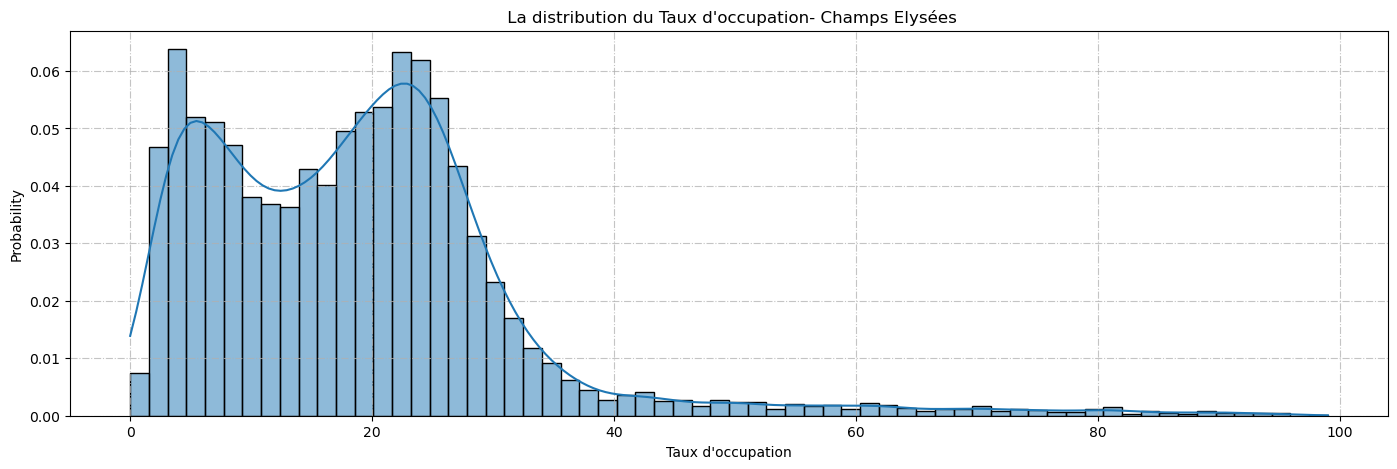

In [234]:
f, ax = plt.subplots(figsize=(17, 5))
ax = sns.histplot(champs_elysees["Taux d'occupation"], kde=True, stat='probability')
ax.set_title(" La distribution du Taux d'occupation- Champs Elysées")
ax.grid(True, ls='-.', alpha=0.75)
plt.show()

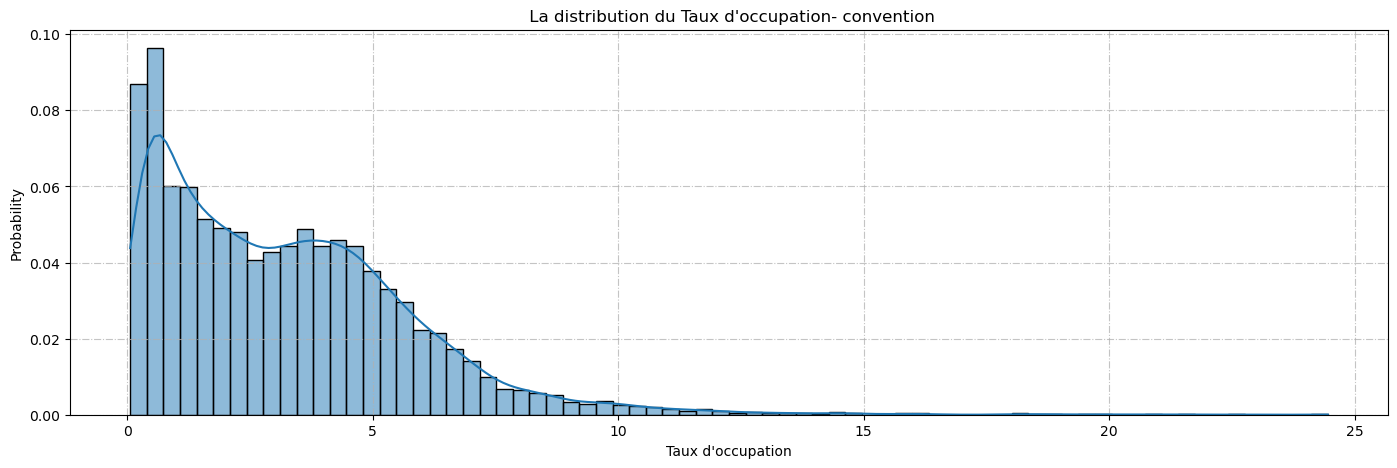

In [219]:
f, ax = plt.subplots(figsize=(17, 5))
ax = sns.histplot(convention["Taux d'occupation"], kde=True, stat='probability')
ax.set_title(" La distribution du Taux d'occupation- convention")
ax.grid(True, ls='-.', alpha=0.75)
plt.show()

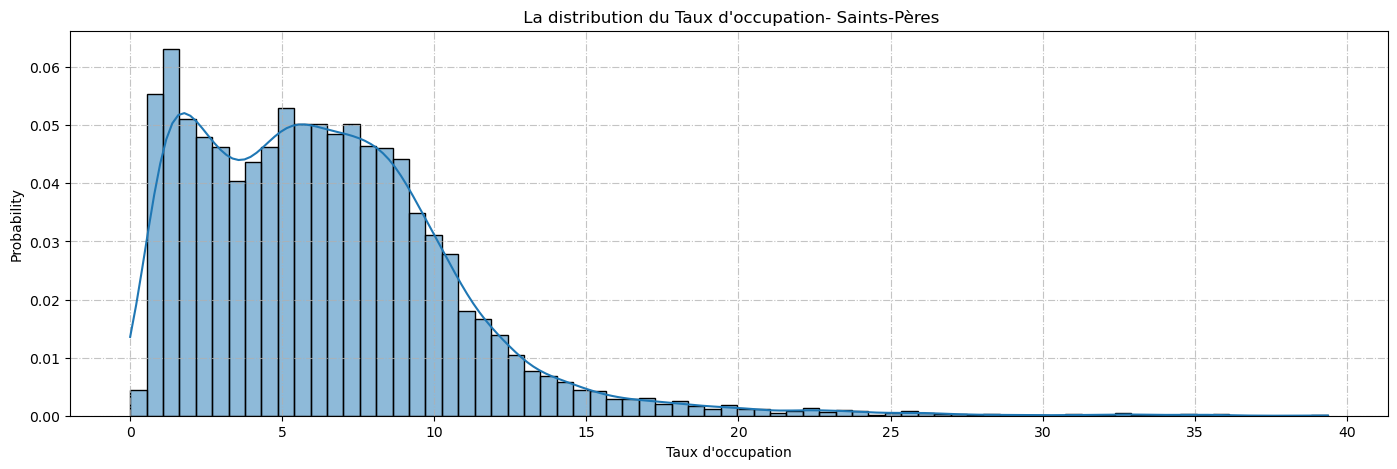

In [220]:
f, ax = plt.subplots(figsize=(17, 5))
ax = sns.histplot(sts["Taux d'occupation"], kde=True, stat='probability')
ax.set_title(" La distribution du Taux d'occupation- Saints-Pères")
ax.grid(True, ls='-.', alpha=0.75)
plt.show()

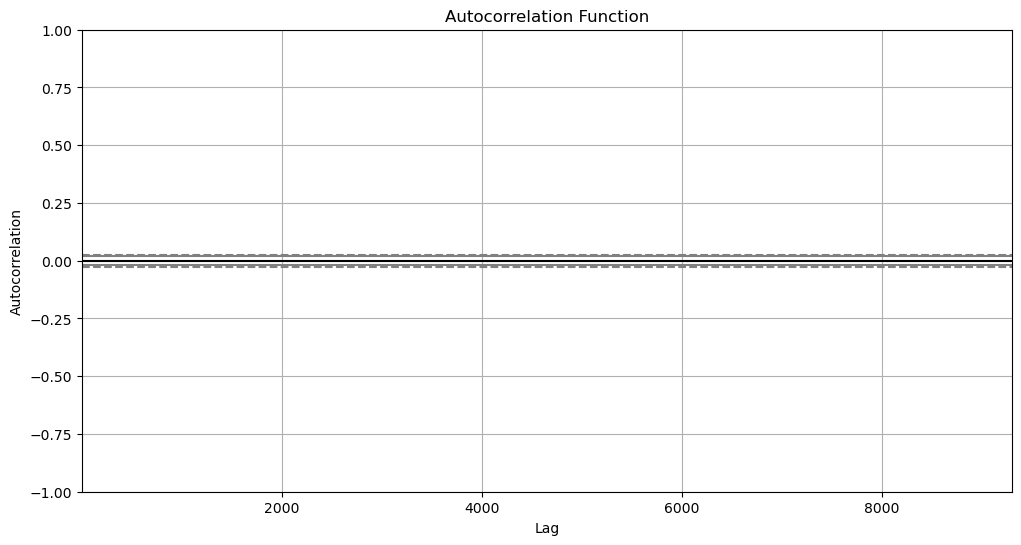

Autocorrelation at lag 1: 0.9029399948276806


In [60]:


autocorrelation = convention["Débit horaire"].autocorr()

# Plot the autocorrelation function
plt.figure(figsize=(12, 6))
pd.plotting.autocorrelation_plot(convention["Débit horaire"])
plt.title('Autocorrelation Function')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

print(f"Autocorrelation at lag 1: {autocorrelation}")


### ARMA

In [131]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose



In [140]:
champs=champs_elysees[['Date et heure de comptage','Débit horaire',"Taux d'occupation"]]
stpr=sts[['Date et heure de comptage','Débit horaire',"Taux d'occupation"]]
cvtion=convention[['Date et heure de comptage','Débit horaire',"Taux d'occupation"]]

In [141]:
champs=champs.set_index('Date et heure de comptage')
stpr=stpr.set_index('Date et heure de comptage')
cvtion=cvtion.set_index('Date et heure de comptage')

In [158]:
pd.DataFrame(champs['debit_horaire_lag']).index

DatetimeIndex(['2022-11-01 04:00:00+00:00', '2022-11-01 05:00:00+00:00',
               '2022-11-01 06:00:00+00:00', '2022-11-01 07:00:00+00:00',
               '2022-11-01 08:00:00+00:00', '2022-11-01 09:00:00+00:00',
               '2022-11-01 10:00:00+00:00', '2022-11-01 11:00:00+00:00',
               '2022-11-01 12:00:00+00:00', '2022-11-01 13:00:00+00:00',
               ...
               '2023-11-30 14:00:00+00:00', '2023-11-30 15:00:00+00:00',
               '2023-11-30 16:00:00+00:00', '2023-11-30 17:00:00+00:00',
               '2023-11-30 18:00:00+00:00', '2023-11-30 19:00:00+00:00',
               '2023-11-30 20:00:00+00:00', '2023-11-30 21:00:00+00:00',
               '2023-11-30 22:00:00+00:00', '2023-11-30 23:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date et heure de comptage', length=8966, freq=None)

In [240]:
for i in range(1, 5):  # Assuming a 4-day step
    df[f"Taux d'occupation_lag_{i}"] = df["Taux d'occupation"].shift(i)
    df[f"Débit horaire_lag_{i}"] = df["Débit horaire"].shift(i)

df.dropna(inplace=True)
X_cols = ['debit_horaire_lag', "Taux d'occupation_lag"]
y_cols = ["Débit horaire", "Taux d'occupation"]

X = df[X_cols]
y = df[y_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


C:\Users\bacca\AppData\Local\Temp\ipykernel_35240\3445557650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['debit_horaire_lag'] = df["Débit horaire"].shift(1)
C:\Users\bacca\AppData\Local\Temp\ipykernel_35240\3445557650.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Taux d'occupation_lag"] = df["Taux d'occupation"].shift(1)
C:\Users\bacca\AppData\Local\Temp\ipykernel_35240\3445557650.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

In [242]:
from pmdarima import auto_arima


model = auto_arima(y_train["Taux d'occupation"], seasonal=False, m=12)
print(model.order)
print(model.seasonal_order)

c:\Users\bacca\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


(2, 1, 2)
(0, 0, 0, 0)


In [243]:
"""sarima_debit_horaire = SARIMAX(y_train["Débit horaire"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_debit_horaire_fit = sarima_debit_horaire.fit()"""

# SARIMA model for 'taux d'occupation'
sarima_taux_occupation = SARIMAX(y_train["Taux d'occupation"], order=(2, 1, 2), seasonal_order=(1, 1, 1, 12))
sarima_taux_occupation_fit = sarima_taux_occupation.fit()


c:\Users\bacca\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\bacca\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\bacca\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [244]:
#y_pred_debit_horaire = sarima_debit_horaire_fit.get_forecast(steps=len(X_test)).predicted_mean
y_pred_taux_occupation = sarima_taux_occupation_fit.get_forecast(steps=len(X_test)).predicted_mean


c:\Users\bacca\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [246]:
#mse_debit_horaire = mean_squared_error(y_test["Débit horaire"], y_pred_debit_horaire)
mse_taux_occupation = mean_squared_error(y_test["Taux d'occupation"], y_pred_taux_occupation)

#print(f'Mean Squared Error (Débit horaire): {mse_debit_horaire}')
print(f'Mean Squared Error (taux d\'occupation): {mse_taux_occupation}')

Mean Squared Error (taux d'occupation): 513.6846611629661


In [249]:
y_pred_taux_occupation.index

RangeIndex(start=7220, stop=9025, step=1)

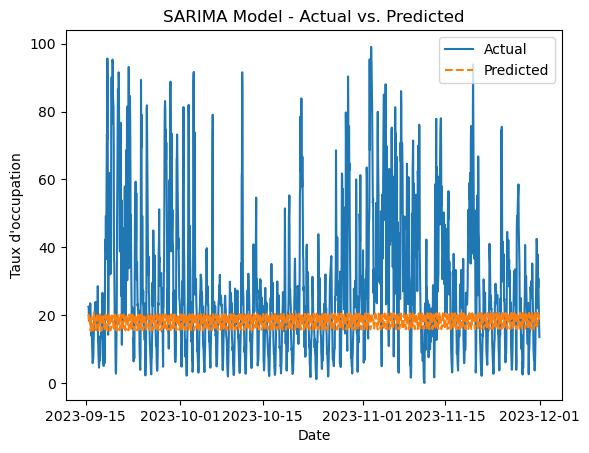

In [257]:

plt.plot(y_test.index, y_test["Taux d'occupation"], label='Actual')
plt.plot(y_test.index, y_pred_taux_occupation, label='Predicted', linestyle='--')

# Adding labels and legend
plt.xlabel('Date')
plt.ylabel("Taux d'occupation")
plt.title('SARIMA Model - Actual vs. Predicted')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

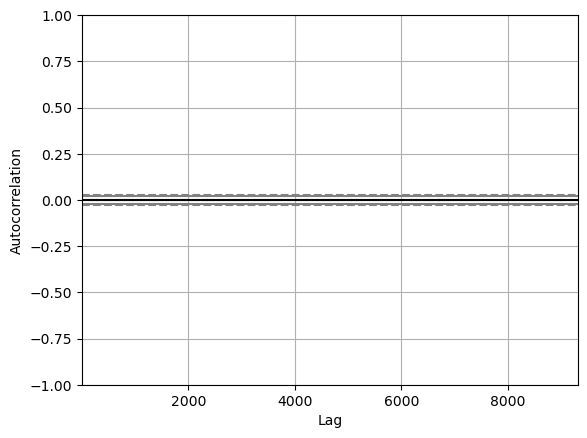

In [76]:


autocorrelation_plot(champs["Taux d'occupation"])

c:\Users\bacca\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\bacca\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\bacca\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\bacca\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


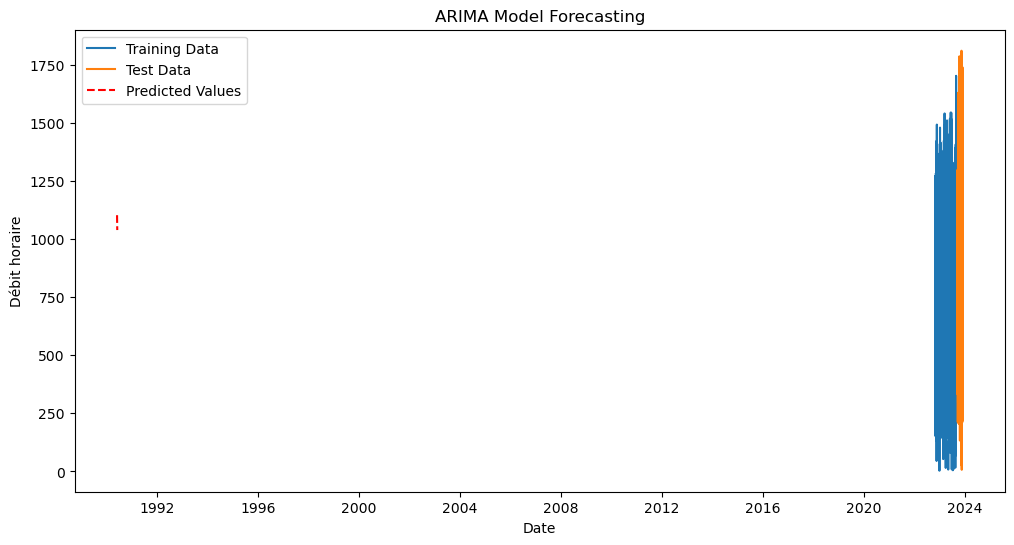

In [70]:


train_size = int(len(champs) * 0.8)  # 80% for training
train, test = champs.iloc[:train_size], champs.iloc[train_size:]

# Fit ARIMA model on the training set
p, d, q = 1, 0, 0  # Adjust these parameters based on your analysis
model = ARIMA(train['Débit horaire'], order=(p, d, q))
results = model.fit()

# Forecast the next 4 dates
forecast_values = results.get_forecast(steps=4).predicted_mean

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Débit horaire'], label='Training Data')
plt.plot(test.index, test['Débit horaire'], label='Test Data')
plt.plot(forecast_values.index, forecast_values, label='Predicted Values', linestyle='dashed', color='red')
plt.title('ARIMA Model Forecasting')
plt.xlabel('Date')
plt.ylabel('Débit horaire')
plt.legend()
plt.show()

In [99]:
max_lag = 1  # Adjust the maximum lag value based on your analysis
for lag in range(1, max_lag + 1):
    champs[f"Taux d'occupation_T-{lag}"] = champs["Taux d'occupation"].shift(lag)
    champs[f"Débit horaire_T-{lag}"] = champs["Débit horaire"].shift(lag)
# Drop rows with NaN values due to the lag

In [100]:
champs

,Débit horaire,Taux d'occupation,Taux d'occupation_T-1,Débit horaire_T-1
Date et heure de comptage,,,,
2022-11-01 04:00:00+00:00,513.0,7.12889,NaN,NaN
2022-11-01 05:00:00+00:00,494.0,6.22500,7.12889,513.0
2022-11-01 06:00:00+00:00,513.0,5.80723,6.22500,494.0
2022-11-01 07:00:00+00:00,484.0,5.57111,5.80723,513.0
2022-11-01 08:00:00+00:00,524.0,6.20055,5.57111,484.0
...,...,...,...,...
2023-11-30 19:00:00+00:00,1433.0,30.87000,28.16000,1457.0
2023-11-30 20:00:00+00:00,1253.0,24.38111,30.87000,1433.0
2023-11-30 21:00:00+00:00,1069.0,20.40723,24.38111,1253.0


["Taux d'occupation_T-0", "Taux d'occupation_T-1"]

In [104]:
max_lag = 1  # Adjust the maximum lag value based on your analysis
for lag in range(1, max_lag + 1):
    champs[f"Taux d'occupation_T-{lag}"] = champs["Taux d'occupation"].shift(lag)
    champs[f"Débit horaire_T-{lag}"] = champs["Débit horaire"].shift(lag)
# Drop rows with NaN values due to the lag

champs.dropna(inplace=True)

# Define X and y
X = champs[[f"Taux d'occupation_T-{lag}" for lag in range(1,max_lag+1)]+[f"Débit horaire_T-{lag}" for lag in range(1,max_lag+1)]]
y = champs[["Taux d'occupation",'Débit horaire']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Standardize features if necessary (especially for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [107]:
# XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')
xgb_model.fit(X_train, y_train)
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled, y_train)


# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate models
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mse_knn = mean_squared_error(y_test, y_pred_knn)

print(f'Mean Squared Error (XGBoost): {mse_xgb}')
print(f'Mean Squared Error (KNN): {mse_knn}')

Mean Squared Error (XGBoost): 17016.929804772117
Mean Squared Error (KNN): 23440.62226979112


### LSTM

ValueError: x and y must have same first dimension, but have shapes (1805,) and (1781, 1)

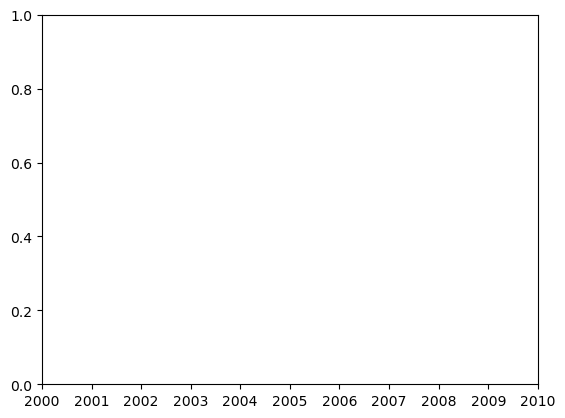

In [282]:
plt.plot(test.index,y_test, label='Actual')
plt.plot(test.index,y_pred, label='Predicted', linestyle='--')
plt.legend()
plt.show()

In [270]:
mse = mean_squared_error(y_test, y_pred)


In [275]:
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 24  # Sequence length for each input
X_train, y_train = create_sequences(train["Taux d\'occupation"], seq_length)
X_test, y_test = create_sequences(test["Taux d\'occupation"], seq_length)

In [276]:
# Define and train the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
225/225 [==============================] - 9s 21ms/step - loss: 0.0044
Epoch 2/50
225/225 [==============================] - 5s 20ms/step - loss: 0.0024
Epoch 3/50
225/225 [==============================] - 5s 21ms/step - loss: 0.0023
Epoch 4/50
225/225 [==============================] - 5s 22ms/step - loss: 0.0021
Epoch 5/50
225/225 [==============================] - 5s 23ms/step - loss: 0.0021
Epoch 6/50
225/225 [==============================] - 5s 23ms/step - loss: 0.0020
Epoch 7/50
225/225 [==============================] - 5s 21ms/step - loss: 0.0020
Epoch 8/50
225/225 [==============================] - 6s 25ms/step - loss: 0.0019
Epoch 9/50
225/225 [==============================] - 5s 24ms/step - loss: 0.0019
Epoch 10/50
225/225 [==============================] - 5s 24ms/step - loss: 0.0019
Epoch 11/50
225/225 [==============================] - 5s 23ms/step - loss: 0.0019
Epoch 12/50
225/225 [==============================] - 5s 21ms/step - loss: 0.0019
Epoch 13/50
2

In [277]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Inverse scale the predicted and actual values
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)


56/56 [==============================] - 1s 8ms/step
Mean Squared Error (MSE): 143.76052237673062


Epoch 1/50
10/10 [==============================] - 8s 24ms/step - loss: 0.0308
Epoch 2/50
10/10 [==============================] - 0s 11ms/step - loss: 0.0265
Epoch 3/50
10/10 [==============================] - 0s 22ms/step - loss: 0.0225
Epoch 4/50
10/10 [==============================] - 0s 16ms/step - loss: 0.0190
Epoch 5/50
10/10 [==============================] - 0s 13ms/step - loss: 0.0158
Epoch 6/50
10/10 [==============================] - 0s 17ms/step - loss: 0.0132
Epoch 7/50
10/10 [==============================] - 0s 17ms/step - loss: 0.0109
Epoch 8/50
10/10 [==============================] - 0s 26ms/step - loss: 0.0090
Epoch 9/50
10/10 [==============================] - 0s 22ms/step - loss: 0.0075
Epoch 10/50
10/10 [==============================] - 0s 16ms/step - loss: 0.0063
Epoch 11/50
10/10 [==============================] - 0s 19ms/step - loss: 0.0054
Epoch 12/50
10/10 [==============================] - 0s 22ms/step - loss: 0.0047
Epoch 13/50
10/10 [==================

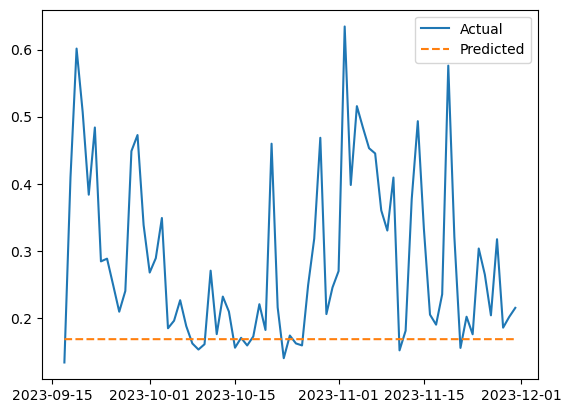

In [293]:



# Resample the data to daily frequency and fill missing values
df_resampled = df['Taux d\'occupation'].resample('D').mean().fillna(method='ffill')

scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_resampled.values.reshape(-1, 1))

def create_lagged_dataset(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps, 0])
        y.append(data[i+n_steps, 0])
    return np.array(X), np.array(y)

n_steps = 24  #  daily data with hourly frequency

X, y = create_lagged_dataset(df_normalized, n_steps)

X = X.reshape((X.shape[0], n_steps, 1))

train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Build the Transformer model using the functional API
inputs = Input(shape=(n_steps, 1))
attention = MultiHeadAttention(num_heads=4, key_dim=1)(inputs, inputs)
attention = LayerNormalization(epsilon=1e-6)(attention + inputs)
pooling = GlobalAveragePooling1D()(attention)
output = Dense(units=1)(pooling)
model = Model(inputs=inputs, outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, batch_size=32)

y_pred = model.predict(X_test)

# Invert scaling for evaluation metrics
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))



mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

#  predictions vs actual values
plt.plot(df_resampled.index[train_size+n_steps:], y_test, label='Actual')
plt.plot(df_resampled.index[train_size+n_steps:], y_pred, label='Predicted', linestyle='--')
plt.legend()
plt.show()


In [294]:
mse

0.030103308585786064

In [297]:
##### LSTM
scaler = MinMaxScaler()
df['Taux d\'occupation'] = scaler.fit_transform(df[['Taux d\'occupation']])
df['Taux d\'occupation_lag_1'] = df['Taux d\'occupation'].shift(1)  # Create a lag feature
df.dropna(inplace=True)

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

seq_length = 24  

# predicting the next 10 days
forecast_horizon = 10

def create_sequences(data, seq_length, forecast_horizon):
    X = []
    y = []
    for i in range(len(data) - seq_length - forecast_horizon + 1):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length:i+seq_length+forecast_horizon])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train["Taux d\'occupation"], seq_length, forecast_horizon)
X_test, y_test = create_sequences(test["Taux d\'occupation"], seq_length, forecast_horizon)


model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(units=forecast_horizon))  # Adjust units based on the forecast horizon
cp=ModelCheckpoint('model/',save_best_only=True)
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32,callback=[cp])


y_pred = model.predict(X_test)

y_pred = scaler.inverse_transform(y_pred.reshape(-1, forecast_horizon))
y_test = scaler.inverse_transform(y_test.reshape(-1, forecast_horizon))

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)


Epoch 1/50
225/225 [==============================] - 8s 25ms/step - loss: 0.0102
Epoch 2/50
225/225 [==============================] - 5s 24ms/step - loss: 0.0050
Epoch 3/50
225/225 [==============================] - 5s 23ms/step - loss: 0.0046
Epoch 4/50
225/225 [==============================] - 6s 28ms/step - loss: 0.0044
Epoch 5/50
225/225 [==============================] - 6s 25ms/step - loss: 0.0042
Epoch 6/50
225/225 [==============================] - 5s 24ms/step - loss: 0.0042
Epoch 7/50
225/225 [==============================] - 5s 24ms/step - loss: 0.0041
Epoch 8/50
225/225 [==============================] - 6s 27ms/step - loss: 0.0040
Epoch 9/50
225/225 [==============================] - 6s 25ms/step - loss: 0.0039
Epoch 10/50
225/225 [==============================] - 5s 24ms/step - loss: 0.0039
Epoch 11/50
225/225 [==============================] - 6s 26ms/step - loss: 0.0039
Epoch 12/50
225/225 [==============================] - 6s 26ms/step - loss: 0.0038
Epoch 13/50
2

In [301]:
y_test

array([[0.18528397, 0.17653767, 0.19526394, ..., 0.19879728, 0.20550964,
        0.16883841],
       [0.17653767, 0.19526394, 0.20577532, ..., 0.20550964, 0.16883841,
        0.1917749 ],
       [0.19526394, 0.20577532, 0.20681922, ..., 0.16883841, 0.1917749 ,
        0.18537889],
       ...,
       [0.31304331, 0.30266796, 0.25397017, ..., 0.24664413, 0.20969772,
        0.18707125],
       [0.30266796, 0.25397017, 0.19751299, ..., 0.20969772, 0.18707125,
        0.16575431],
       [0.25397017, 0.19751299, 0.28712702, ..., 0.18707125, 0.16575431,
        0.14833442]])

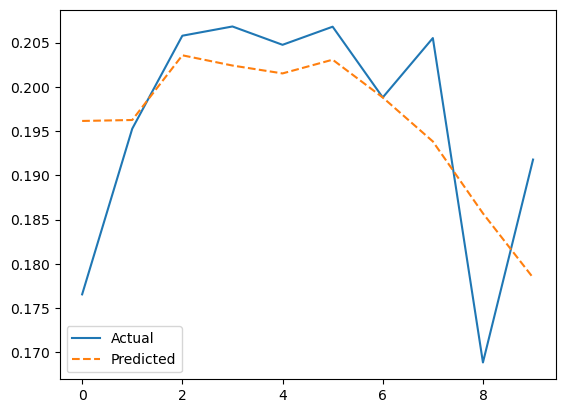

In [303]:
plt.plot(y_test[1], label='Actual')
plt.plot( y_pred[1], label='Predicted', linestyle='--')
plt.legend()
plt.show()